In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from IPython.display import Image
import os
!ls ../input/

**Credit/Debit card frauds** are now inclining all over the World. Before the creation of this notebook I was curious that how can any credit/debit card can be hacked? But then on other thought it seems that this competition is to prevent the money of those bank consumers who lost their card.

After some research, the things got clearer to me and I have gain a perspective about how these transaction works in a banking industry, and after that I have no doubts about how easily a card can be hacked. 


Data lies in magnetic strips of a card is vulnerable because the data is unchanged. By using fake terminals and fake pin pads, it is very easy to steal data from card and use for fraudulent transactions.

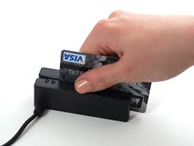


So to overcome this problem banking industry uses chip card or EMV authentication with pin which is an expensive option because you need PTI/PTS approved terminals/machines for transactions. Important and different feature of EMV cards or EMV transactions is that the data always changes for each transaction. Thus, no one can steal cards data. But what if a bank’s consumer loses his card?

For this I come up with a new idea of card-less transactions through which there is no fear of card stolen/misuse. The diagram is as follows:

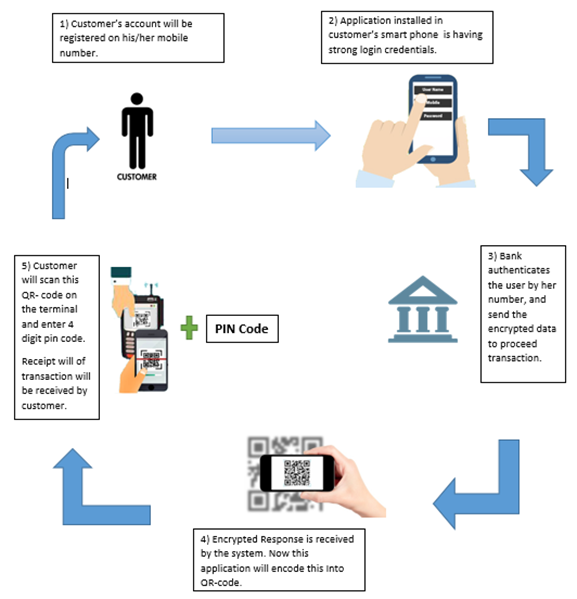


In any case if anyone leads to do a fraudulent transaction, she could have caught through Machine learning algorithms too. So let’s start with this kernel. 



In [ ]:
#Importing Libraries

#data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import math

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py

In [ ]:
data_train = pd.read_csv('../input/ieee-fraud-detection/train_transaction.csv',nrows = 200000)
data_test = pd.read_csv('../input/ieee-fraud-detection/test_transaction.csv',nrows = 200000)

In [ ]:
print(len(data_train));

In [ ]:
data_train.head()

In [ ]:
data_test.head()

In [ ]:
data_train.info()

In [ ]:
data_train.describe()

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='isFraud',data=data_train,palette='RdBu_r')

Non fraudlent transaction are high as obvious, These type of datasets is a challenge to cater.

In [ ]:
statistics_of_data = []
for col in data_train.columns:
  statistics_of_data.append((col,
                             data_train[col].nunique(),
                             data_train[col].isnull().sum()*100/data_train.shape[0],
                             data_train[col].value_counts(normalize=True, dropna=False).values[0] * 100, 
                             data_train[col].dtype
                             ))
stats_df = pd.DataFrame(statistics_of_data, columns=['Feature', 'Uniq_val', 'missing_val', 'val_biggest_cat', 'type'])

In [ ]:
stats_df.sort_values('missing_val', ascending=False)

In [ ]:
stats_df.sort_values('val_biggest_cat', ascending=False)

**Some Important Observations are:**

Missing Values are starting with 93 %.

There are columns which do have above 99% same values, We need to remove them lately otherwise these columns will bias the model. **


In [ ]:
#There are some biased records having more than 98% same value. We consider them to be out of this data set

for col in data_train.columns:
    rate = data_train[col].value_counts(normalize=True, dropna=False).values[0]
    if rate > 0.98:
        #data_train = data_train.drop(col,inplace=True)
        print(col)

In [ ]:
#Dropping all biased columns

combine = [data_train, data_test]
print("Before", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

In [ ]:
data_train = data_train.drop(['C3','V107','V108','V109','V110','V111','V112','V113','V114','V116','V117','V118','V119','V120','V121','V122','V305'],axis =1)


In [ ]:
data_test = data_test.drop(['C3','V107','V108','V109','V110','V111','V112','V113','V114','V116','V117','V118','V119','V120','V121','V122','V305'],axis =1)

In [ ]:
combine = [data_train, data_test]
print("After", data_train.shape, data_test.shape,combine[0].shape, combine[1].shape)

**Now we need to do Exploratory data analysis to find out which feature is more important for TARGET variable.**

In [ ]:
def exploreFeatures(col):
  top_n=10
  top_n = top_n if data_train[col].nunique() > top_n else data_train[col].nunique()
  print("col has {0} unique values and type {1}:".format(data_train[col].nunique(),data_train[col].dtype))
  print(data_train[col].value_counts(normalize=True, dropna=False).head(10))
    

**First of all we will explore our categorical Features:**

In [ ]:
exploreFeatures('ProductCD')

In [ ]:
exploreFeatures('card4')

In [ ]:
exploreFeatures('card6')

In [ ]:
exploreFeatures('P_emaildomain')

In [ ]:
exploreFeatures('R_emaildomain')

In [ ]:
exploreFeatures('M1')

In [ ]:
exploreFeatures('M2')

In [ ]:
exploreFeatures('M3')

In [ ]:
exploreFeatures('M4')

In [ ]:
exploreFeatures('M5')

In [ ]:
exploreFeatures('M6')

In [ ]:
exploreFeatures('M7')

In [ ]:
exploreFeatures('M8')

In [ ]:
exploreFeatures('M9')

Now, Transforming these categorical features into binary and order format

In [ ]:
combine = [data_train,data_test]
freq_feature = data_train.M1.dropna().mode()[0]
titlemapping = {'F':0, 'T':1}
for row in combine:
    freq_feature =1
    row['M1'] = row['M1'].map(titlemapping)
    row['M1'] = row['M1'].fillna(freq_feature)

In [ ]:
combine = [data_train,data_test]
freq_feature = data_train.M2.dropna().mode()[0]
titlemapping = {'F':0, 'T':1}
for row in combine:
    freq_feature = 1
    row['M2'] = row['M2'].map(titlemapping)
    row['M2'] = row['M2'].fillna(freq_feature)

In [ ]:
combine = [data_train,data_test]
freq_feature = data_train.M3.dropna().mode()[0]
titlemapping = {'F':0, 'T':1}
for row in combine:
    freq_feature = 1
    row['M3'] = row['M3'].map(titlemapping)
    row['M3'] = row['M3'].fillna(freq_feature)

In [ ]:


combine = [data_train,data_test]
freq_feature = data_train.M4.dropna().mode()[0]
titlemapping = {'M0':3, 'M2':2,'M1':1}
for row in combine:
    freq_feature = 3
    row['M4'] = row['M4'].map(titlemapping)
    row['M4'] = row['M4'].fillna(freq_feature)

In [ ]:
combine = [data_train,data_test]
freq_feature = data_train.M5.dropna().mode()[0]
titlemapping = {'F':0, 'T':1}
for row in combine:
    freq_feature = 0
    row['M5'] = row['M5'].map(titlemapping)
    row['M5'] = row['M5'].fillna(freq_feature)

In [ ]:
combine = [data_train,data_test]
freq_feature = data_train.M6.dropna().mode()[0]
titlemapping = {'F':0, 'T':1}
for row in combine:
    freq_feature = 0
    row['M6'] = row['M6'].map(titlemapping)
    row['M6'] = row['M6'].fillna(freq_feature)

In [ ]:
combine = [data_train,data_test]
freq_feature = data_train.M7.dropna().mode()[0]
titlemapping = {'F':0, 'T':1}
for row in combine:
    freq_feature =0
    row['M7'] = row['M7'].map(titlemapping)
    row['M7'] = row['M7'].fillna(freq_feature)

In [ ]:
combine = [data_train,data_test]
freq_feature = data_train.M8.dropna().mode()[0]
titlemapping = {'F':0, 'T':1}
for row in combine:
    freq_feature = 0
    row['M8'] = row['M8'].map(titlemapping)
    row['M8'] = row['M8'].fillna(freq_feature)

In [ ]:
combine = [data_train,data_test]
freq_feature = data_train.M9.dropna().mode()[0]
titlemapping = {'F':0, 'T':1}
for row in combine:
    freq_feature = 1
    row['M9'] = row['M9'].map(titlemapping)
    row['M9'] = row['M9'].fillna(freq_feature)

Now Transforming categorical column's datatypes into 'category', intiall they were in '0'

In [ ]:
data_train['ProductCD'] = data_train['ProductCD'].astype('category')
data_test['ProductCD'] = data_test['ProductCD'].astype('category')

data_train['card4'] = data_train['card4'].astype('category')
data_test['card4'] = data_test['card4'].astype('category')

data_train['card6'] = data_train['card6'].astype('category')
data_test['card6'] = data_test['card6'].astype('category')

data_train['P_emaildomain'] = data_train['P_emaildomain'].astype('category')
data_test['P_emaildomain'] = data_test['P_emaildomain'].astype('category')

data_train['R_emaildomain'] = data_train['R_emaildomain'].astype('category')
data_test['R_emaildomain'] = data_test['R_emaildomain'].astype('category')


**FEATURE ENGINEERING**

In [ ]:
y = data_train['isFraud']
X = data_train.drop(['isFraud'], axis=1)


In [ ]:
binary_variables = [c for c in X.columns if X[c].nunique() == 2]
binary_variables

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = X.select_dtypes(include=numerics)

In [ ]:
trueNumericCol = [c for c in newdf.columns 
                       if (c not in binary_variables)]
trueNumericCol

In [ ]:
categorical_columns = [c for c in X.columns 
                       if (c not in trueNumericCol) & (c not in binary_variables)]
categorical_columns


In [ ]:
#NOW, We Will Start Frequency encoding:

#Frequency Encoding

from tqdm import tqdm
from tqdm import tqdm_notebook
#from sklearn.preprocessing import LabelEncoder
def frequency_encoding(variable):
    t = pd.concat([data_train[variable], data_test[variable]]).value_counts().reset_index()
    t = t.reset_index()
    t.loc[t[variable] == 1, 'level_0'] = np.nan
    t.set_index('index', inplace=True)
    max_label = t['level_0'].max() + 1
    t.fillna(max_label, inplace=True)
    return t.to_dict()['level_0']

In [ ]:
for variable in tqdm(categorical_columns):
  freq_enc_dict = frequency_encoding(variable)
  data_train[variable] = data_train[variable].map(lambda x: freq_enc_dict.get(x, np.nan))
  data_test[variable] = data_test[variable].map(lambda x: freq_enc_dict.get(x, np.nan))

**Now, Lets start with Light Gradient Boosting Implementation**

In [ ]:
#Initalizing the parameters first

param = {'num_leaves': 60,
         'min_data_in_leaf': 60, 
         'objective':'binary',
         'max_depth': -1,
         'learning_rate': 0.1,
         "boosting": "gbdt",
         "feature_fraction": 0.8,
         "bagging_freq": 1,
         "bagging_fraction": 0.8 ,
         "bagging_seed": 11,
         "metric": 'auc',
         "lambda_l1": 0.1,
         "verbosity": -1}

In [ ]:
import gc
max_iter = 5
gc.collect()

In [ ]:
from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit
folds = KFold(n_splits=5, shuffle=True, random_state=15)
oof = np.zeros(len(X))
categorical_columns = [c for c in categorical_columns]
features = [c for c in X.columns]
predictions = np.zeros(len(data_test))

In [ ]:
import time
import datetime
start = time.time()
feature_importance_df = pd.DataFrame()
start_time= time.time()

In [ ]:
score = [0 for _ in range(folds.n_splits)]

In [ ]:
from sklearn import metrics
import lightgbm as lgb

In [ ]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(X.values, y.values)):
    print("fold n°{}".format(fold_))
    trn_data = lgb.Dataset(X.iloc[trn_idx][features],
                           label=y.iloc[trn_idx],
                           categorical_feature = categorical_columns
                          )
    val_data = lgb.Dataset(X.iloc[val_idx][features],
                           label=y.iloc[val_idx],
                           categorical_feature = categorical_columns
                          )
    num_round = 10000
    clf = lgb.train(param,
                    trn_data,
                    num_round,
                    valid_sets = [trn_data, val_data],
                    verbose_eval=100,
                    early_stopping_rounds = 200)
    
    oof[val_idx] = clf.predict(X.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["feature"] = features
    fold_importance_df["importance"] = clf.feature_importance(importance_type='gain')
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    # we perform predictions by chunks
    initial_idx = 0
    chunk_size = 100000
    current_pred = np.zeros(len(data_test))
    while initial_idx < data_test.shape[0]:
        final_idx = min(initial_idx + chunk_size, data_test.shape[0])
        idx = range(initial_idx, final_idx)
        current_pred[idx] = clf.predict(data_test.iloc[idx][features], num_iteration=clf.best_iteration)
        initial_idx = final_idx
    predictions += current_pred / min(folds.n_splits, max_iter)
    print("time elapsed: {:<5.2}s".format((time.time() - start_time) / 3600))
    score[fold_] = metrics.roc_auc_score(y.iloc[val_idx], oof[val_idx])
    if fold_ == max_iter - 1: break

if (folds.n_splits == max_iter):
    print("CV score: {:<8.5f}".format(metrics.roc_auc_score(y, oof)))
else:
     print("CV score: {:<8.5f}".format(sum(score) / max_iter))

In [ ]:
cols = (feature_importance_df[["feature", "importance"]]
        .groupby("feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:1000].index)

best_features = feature_importance_df.loc[feature_importance_df.feature.isin(cols)]

plt.figure(figsize=(14,50))
sns.barplot(x="importance",
            y="feature",
            data=best_features.sort_values(by="importance",
                                           ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')

**Submission:**

In [ ]:
sub_df = pd.DataFrame({"TransactionID": data_test["TransactionID"].values})
sub_df['isFraud'] = predictions

sub_df

Conclusion:

So This is the end of EDA, FE and lgb of credit card fraud detection notebook, I have enjoyed and learned a lot while creating this notebook. A note book which helped me alot is the masterpiece by "FabienDaniel", His notebook's link is: https://www.kaggle.com/fabiendaniel/detecting-malwares-with-lgbm.

I have worked hard for this notebook, Hope this will be helpful for you. Up vote this notebook if you like it. Thanks.

